# Dense Neural Network Example

Modified example from [Stanford's CS231N](http://cs231n.github.io/neural-networks-case-study/)

## Preliminaries

### Imports

In [85]:
# A bit of setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras

import sys
sys.path.append("../..")
from E4525_ML import plots
from E4525_ML.notebook_utils import get_logger,LoggingCallback


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



### Loger

In [57]:
logger=get_logger("NeuralSpiral")

## Data

### Training Data

(-1, 1)

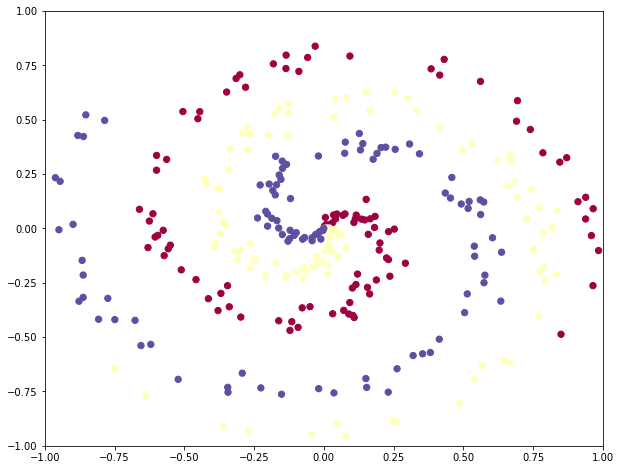

In [24]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*8,(j+1)*8,N) + np.random.randn(N)*0.3 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

### Testing Data

In [60]:
X_test = np.zeros((N*K,D))
y_test = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*8,(j+1)*8,N) + np.random.randn(N)*0.3 # theta
  X_test[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_test[ix] = j

### One hot encoding of labels

In [25]:
def one_hot(y,K):
    N=len(y)
    z=np.zeros((N,K))
    z[np.arange(N),y]=1
    return z

In [61]:
#Train a Linear Classifier

z=one_hot(y,K)
z_test=one_hot(y_test,K)
z[-10:]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

## Numpy Implementation of Neural Network

### Zero hidden layers: Logistic Regression

In [27]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):  
  # evaluate class scores, [N x K]
  eta = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_eta = np.exp(eta)
  z_hat = exp_eta / np.sum(exp_eta, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  L = -np.sum(z*np.log(z_hat),axis=1)
  data_loss = np.sum(L)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print ("iteration {0}: loss {1}".format(i,loss))
  
  # compute the gradient on scores
  delta = z_hat - z
  
  delta /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, delta)
  db = np.sum(delta, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.0984636667332186
iteration 10: loss 1.0847513019511343
iteration 20: loss 1.0805365285405242
iteration 30: loss 1.0791819701436518
iteration 40: loss 1.0787302811297181
iteration 50: loss 1.078575210768259
iteration 60: loss 1.0785207134070869
iteration 70: loss 1.0785011919128085
iteration 80: loss 1.0784940887733732
iteration 90: loss 1.0784914709366404
iteration 100: loss 1.07849049608481
iteration 110: loss 1.0784901300142506
iteration 120: loss 1.0784899916163073
iteration 130: loss 1.0784899389952642
iteration 140: loss 1.0784899188807313
iteration 150: loss 1.0784899111419946
iteration 160: loss 1.078489908132232
iteration 170: loss 1.0784899069349612
iteration 180: loss 1.0784899064343352
iteration 190: loss 1.0784899062023874


In [28]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.39


(-1.9563195622173764, 1.823680437782627)

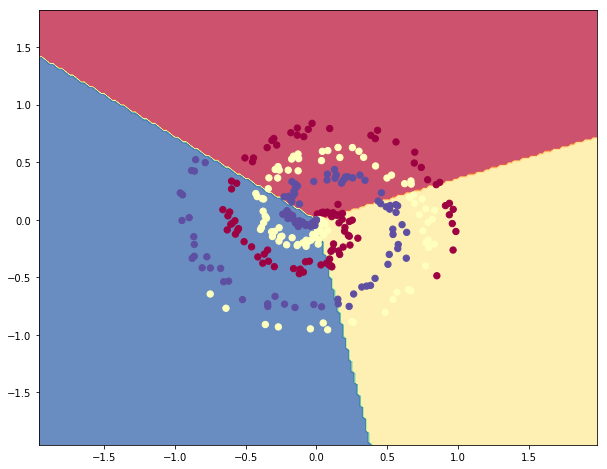

In [29]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

### One Hidden Layer 

In [30]:
# number of hiddend nodes 
nodes = 300 # size of hidden layer

In [31]:
# initialize parameters randomly
W0 = 0.01 * np.random.randn(D,nodes)
b0 = np.zeros((1,nodes))
W1 = 0.01 * np.random.randn(nodes,K)
b1 = np.zeros((1,K))

# some hyperparameters
step_size = 0.1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(50000):
  
  # evaluate class scores, [N x K]
  z1=np.dot(X, W0) + b0
  a1 = np.maximum(0, z1) # ReLU activation
  z2= np.dot(a1, W1) + b1
  eta = z2
  
  # compute the class probabilities
  exp_eta = np.exp(eta)
  z_hat = exp_eta / np.sum(exp_eta, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  L = -np.sum(z*np.log(z_hat),axis=1)
  data_loss = np.sum(L)/num_examples
  reg_loss = 0.5*reg*np.sum(W0*W0) + 0.5*reg*np.sum(W1*W1)
  loss = data_loss + reg_loss
  if i % 5000 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  delta2 = z_hat-z
  delta2 /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW1 = np.dot(a1.T, delta2)
  db1 = np.sum(delta2, axis=0, keepdims=True)
  # next backprop into hidden layer
  delta1 = np.dot(delta2, W1.T)
  # backprop the ReLU non-linearity 
  delta1[a1 <= 0] = 0
  # finally into W,b
  dW0 = np.dot(X.T, delta1)
  db0 = np.sum(delta1, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW1 += reg * W1
  dW0 += reg * W0
  
  # perform a parameter update
  W0 += -step_size * dW0
  b0 += -step_size * db0
  W1 += -step_size * dW1
  b1 += -step_size * db1

iteration 0: loss 1.098626
iteration 5000: loss 0.966063
iteration 10000: loss 0.793346
iteration 15000: loss 0.730837
iteration 20000: loss 0.677471
iteration 25000: loss 0.643310
iteration 30000: loss 0.631119
iteration 35000: loss 0.626036
iteration 40000: loss 0.623128
iteration 45000: loss 0.621701


In [32]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W0) + b0)
eta = np.dot(hidden_layer, W1) + b1
predicted_class = np.argmax(eta, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.94


(-1.9563195622173764, 1.823680437782627)

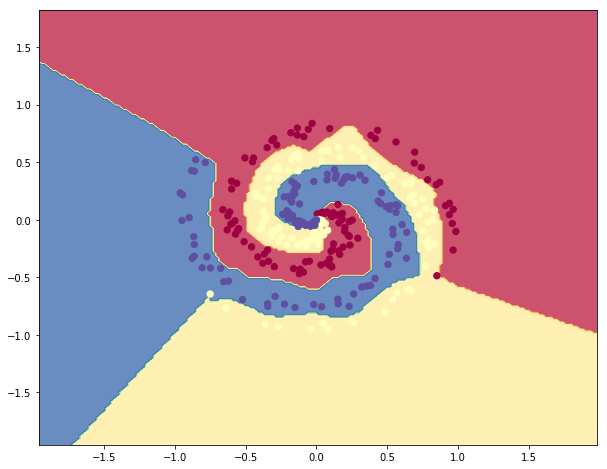

In [33]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W0) + b0), W1) + b1
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

## Neural Network Implementation with Keras

Here we build a function able to generate models with an arbitrary number of hidden layers, each with the same width (number of nodes on each layer)

In [63]:
def build_model(inputs,nlayers, nodes,classes):
    model=keras.Sequential()
    model.add( keras.layers.Reshape((inputs,),input_shape=(D,)))
    for i in range(nlayers):
        model.add( keras.layers.Dense(nodes,activation="relu"))
    model.add(keras.layers.Dense(classes,activation="softmax"))
    return model
            

### One Hidden Layer

In [64]:
nlayers=1

In [65]:
D,K,nodes

(2, 3, 300)

In [72]:
model=build_model(D,nlayers,nodes,K)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 2)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               900       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 903       
Total params: 1,803
Trainable params: 1,803
Non-trainable params: 0
_________________________________________________________________


In [73]:
nepochs=2000

In [74]:
model.fit(X,y,
          validation_data=(X_test,y_test),
          epochs=nepochs,verbose=0,
         callbacks=[LoggingCallback(200,logger)])

2019-04-19 06:09:26,790|	0: TRAIN loss 1.0952,  acc 0.3567  ||  VAL loss 1.0869, acc 0.4267
2019-04-19 06:09:28,425|	200: TRAIN loss 0.7339,  acc 0.6667  ||  VAL loss 0.7524, acc 0.6267
2019-04-19 06:09:30,075|	400: TRAIN loss 0.4789,  acc 0.8267  ||  VAL loss 0.5200, acc 0.8067
2019-04-19 06:09:31,771|	600: TRAIN loss 0.3085,  acc 0.9133  ||  VAL loss 0.3657, acc 0.8900
2019-04-19 06:09:33,470|	800: TRAIN loss 0.2071,  acc 0.9500  ||  VAL loss 0.2745, acc 0.9133
2019-04-19 06:09:35,152|	1000: TRAIN loss 0.1490,  acc 0.9567  ||  VAL loss 0.2225, acc 0.9233
2019-04-19 06:09:36,875|	1200: TRAIN loss 0.1122,  acc 0.9633  ||  VAL loss 0.1948, acc 0.9300
2019-04-19 06:09:38,612|	1400: TRAIN loss 0.0886,  acc 0.9767  ||  VAL loss 0.1741, acc 0.9333
2019-04-19 06:09:40,325|	1600: TRAIN loss 0.0720,  acc 0.9767  ||  VAL loss 0.1599, acc 0.9433
2019-04-19 06:09:42,080|	1800: TRAIN loss 0.0598,  acc 0.9800  ||  VAL loss 0.1555, acc 0.9567


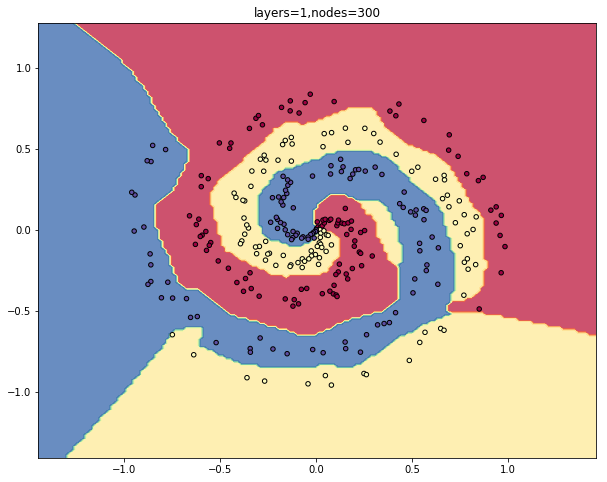

In [75]:
plt.figure()
ax=plt.gca()
ax.set_title(f"layers={nlayers},nodes={nodes}")
plots.decision_boundary_2d(model,X,z,ax,alpha=0.8,slack=0.25)

Keras return class probabilites, we must turn those into class predictions

In [77]:
Y_pred=np.argmax(model.predict(X_test),axis=1)
np.mean(Y_pred==y_test)

0.9566666666666667

### Hyperparameter Search

We investiguate performance as a function of the number of layers and the layer width

In [78]:
layers=[1,2,3]
nodes=[4,8,32]

2019-04-19 06:40:44,475|	0: TRAIN loss 1.1166,  acc 0.3500  ||  VAL loss 1.1153, acc 0.3567
2019-04-19 06:40:47,110|	200: TRAIN loss 1.0727,  acc 0.3700  ||  VAL loss 1.0669, acc 0.3800
2019-04-19 06:40:49,784|	400: TRAIN loss 1.0504,  acc 0.3333  ||  VAL loss 1.0420, acc 0.3233
2019-04-19 06:40:52,742|	600: TRAIN loss 1.0327,  acc 0.3800  ||  VAL loss 1.0268, acc 0.3833
2019-04-19 06:40:55,702|	800: TRAIN loss 1.0220,  acc 0.4267  ||  VAL loss 1.0177, acc 0.4467
2019-04-19 06:40:58,637|	1000: TRAIN loss 1.0156,  acc 0.4600  ||  VAL loss 1.0130, acc 0.4533
2019-04-19 06:41:01,665|	1200: TRAIN loss 1.0125,  acc 0.4500  ||  VAL loss 1.0109, acc 0.4567
2019-04-19 06:41:04,848|	1400: TRAIN loss 1.0109,  acc 0.4433  ||  VAL loss 1.0089, acc 0.4267
2019-04-19 06:41:07,900|	1600: TRAIN loss 1.0100,  acc 0.4500  ||  VAL loss 1.0082, acc 0.4433
2019-04-19 06:41:10,716|	1800: TRAIN loss 1.0095,  acc 0.4533  ||  VAL loss 1.0069, acc 0.4433
>>>>> 1 4 0.45 <<<<<<<<<
2019-04-19 06:41:16,477|	0: TRAI

2019-04-19 06:47:07,194|	800: TRAIN loss 0.0206,  acc 0.9900  ||  VAL loss 0.0336, acc 0.9867
2019-04-19 06:47:15,178|	1000: TRAIN loss 0.0124,  acc 0.9900  ||  VAL loss 0.0344, acc 0.9900
2019-04-19 06:47:24,362|	1200: TRAIN loss 0.0121,  acc 0.9900  ||  VAL loss 0.0446, acc 0.9833
2019-04-19 06:47:32,386|	1400: TRAIN loss 0.0128,  acc 0.9900  ||  VAL loss 0.0353, acc 0.9867
2019-04-19 06:47:40,629|	1600: TRAIN loss 0.0121,  acc 0.9933  ||  VAL loss 0.0298, acc 0.9900
2019-04-19 06:47:49,067|	1800: TRAIN loss 0.0132,  acc 0.9933  ||  VAL loss 0.0515, acc 0.9767
>>>>> 3 256 0.98 <<<<<<<<<


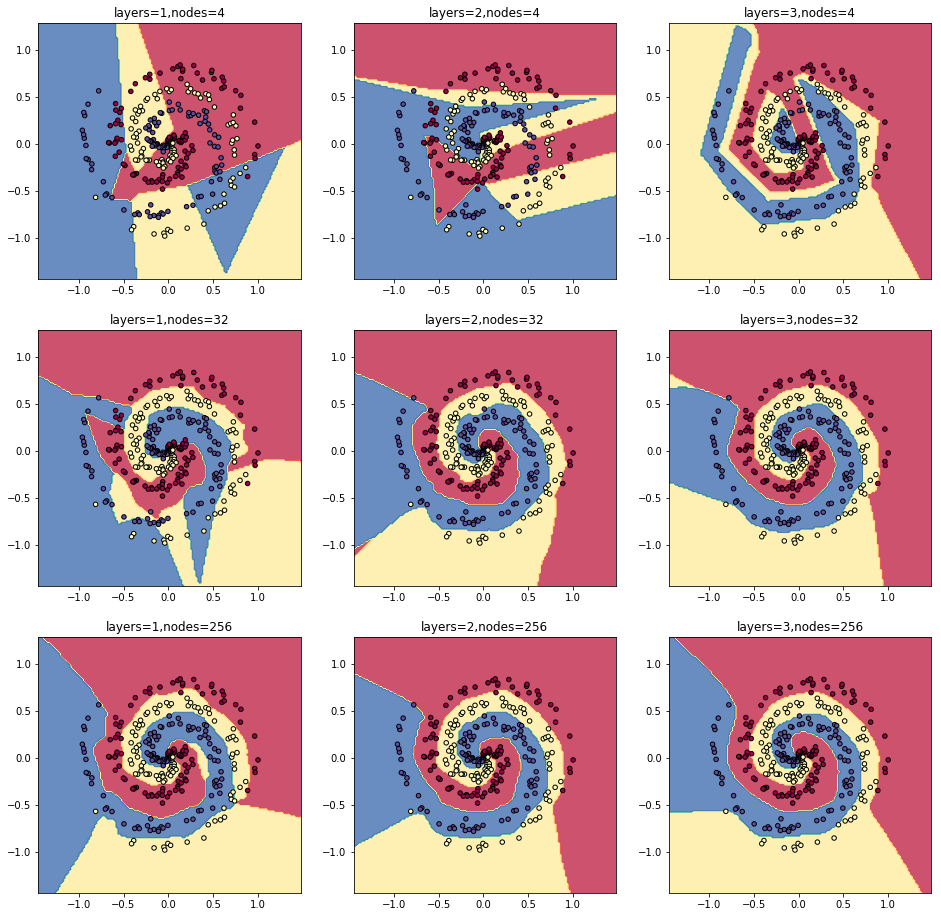

In [95]:
results=[]
# hyper parameters were optimized by hand
fig=plt.figure(figsize=(16, 16))
nrows=len(layers)
ncols=len(nodes)
for row,layer in enumerate(layers):
    for col,node in enumerate(nodes):
        model=build_model(D,layer,node,K)
        model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
        model.fit(X,y,
            validation_data=(X_test,y_test),
            epochs=nepochs,verbose=0,
            callbacks=[LoggingCallback(200,logger)])
        Y_pred=np.argmax(model.predict(X_test),axis=1)
        acc=np.mean(Y_pred==y_test)
        results.append((layer,node,acc))
        print(">>>>>",layer,node,acc,"<<<<<<<<<")
        plot_number=nrows*col + row+1
        plt.subplot(nrows,ncols,plot_number)
        ax=plt.gca()
        ax.set_title(f"layers={layer},nodes={node}")
        plots.decision_boundary_2d(model,X_test,z_test,ax,alpha=0.8,slack=0.25)


In [91]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [98]:
data=pd.DataFrame(results,columns=["layers","nodes","accuracy"])
pivot=data.pivot(index="layers",columns="nodes",values="accuracy")
pivot.style.apply(highlight_max, axis=None)

nodes,4,32,256
layers,,,
1,0.45,0.796667,0.963333
2,0.566667,0.973333,0.983333
3,0.88,0.98,0.98


In [102]:
best=data.iloc[data["accuracy"].idxmax()]
best

layers        2.000000
nodes       256.000000
accuracy      0.983333
Name: 5, dtype: float64

2019-04-19 06:51:15,383|	0: TRAIN loss 1.1340,  acc 0.2900  ||  VAL loss 1.1306, acc 0.2867
2019-04-19 06:51:18,862|	200: TRAIN loss 1.0378,  acc 0.3567  ||  VAL loss 1.0236, acc 0.3800
2019-04-19 06:51:22,283|	400: TRAIN loss 0.9813,  acc 0.3900  ||  VAL loss 0.9660, acc 0.4067
2019-04-19 06:51:25,856|	600: TRAIN loss 0.9567,  acc 0.4100  ||  VAL loss 0.9449, acc 0.4200
2019-04-19 06:51:29,490|	800: TRAIN loss 0.9437,  acc 0.4233  ||  VAL loss 0.9363, acc 0.4200
2019-04-19 06:51:33,029|	1000: TRAIN loss 0.9356,  acc 0.4467  ||  VAL loss 0.9320, acc 0.4233
2019-04-19 06:51:36,433|	1200: TRAIN loss 0.9308,  acc 0.4467  ||  VAL loss 0.9296, acc 0.4233
2019-04-19 06:51:39,942|	1400: TRAIN loss 0.9277,  acc 0.4467  ||  VAL loss 0.9274, acc 0.4233
2019-04-19 06:51:43,452|	1600: TRAIN loss 0.9251,  acc 0.4500  ||  VAL loss 0.9258, acc 0.4267
2019-04-19 06:51:47,207|	1800: TRAIN loss 0.9205,  acc 0.4533  ||  VAL loss 0.9246, acc 0.4333
>>>>> 1 4 0.43333333333333335 <<<<<<<<<
2019-04-19 06:51:

2019-04-19 06:58:07,705|	800: TRAIN loss 0.0126,  acc 0.9933  ||  VAL loss 0.0319, acc 0.9900
2019-04-19 06:58:16,259|	1000: TRAIN loss 0.0121,  acc 0.9933  ||  VAL loss 0.0257, acc 0.9867
2019-04-19 06:58:25,941|	1200: TRAIN loss 0.0139,  acc 0.9933  ||  VAL loss 0.0255, acc 0.9900
2019-04-19 06:58:34,612|	1400: TRAIN loss 0.0124,  acc 0.9900  ||  VAL loss 0.0228, acc 0.9867
2019-04-19 06:58:43,119|	1600: TRAIN loss 0.0130,  acc 0.9933  ||  VAL loss 0.0410, acc 0.9833
2019-04-19 06:58:51,749|	1800: TRAIN loss 0.0131,  acc 0.9933  ||  VAL loss 0.0378, acc 0.9833
>>>>> 3 256 0.9833333333333333 <<<<<<<<<


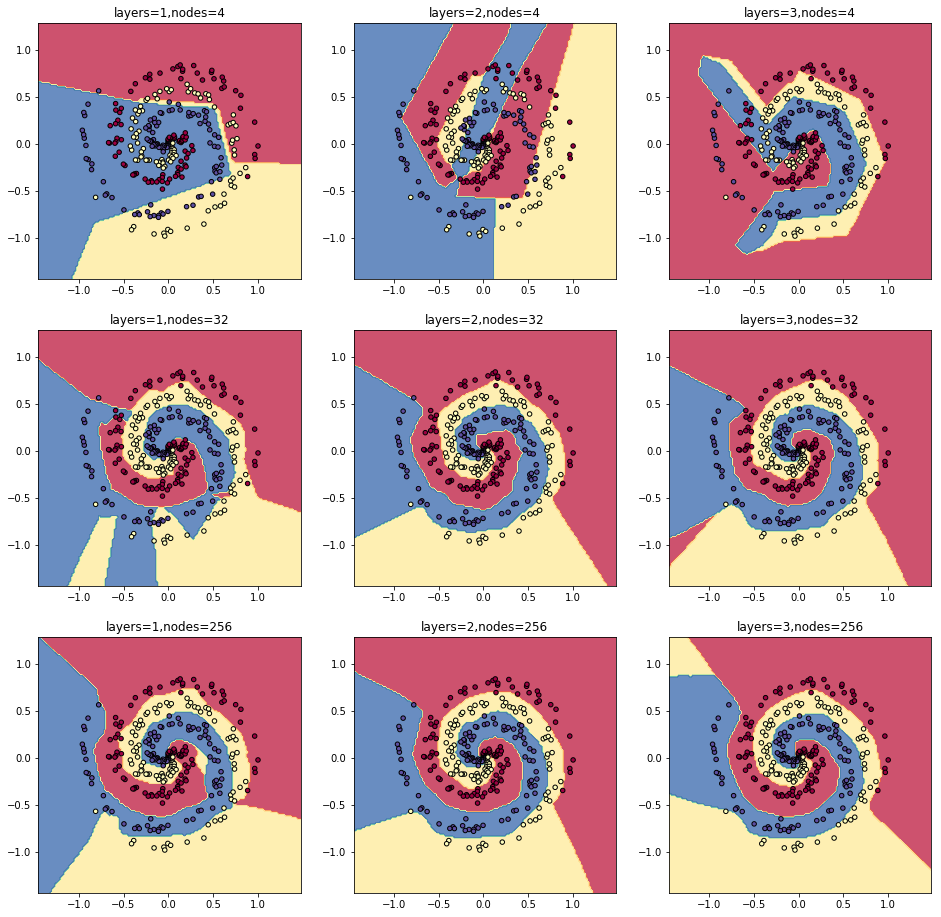

In [103]:
layers=[1,2,3]
nodes=[4,32,256]
results=[]
# hyper parameters were optimized by hand
fig=plt.figure(figsize=(16, 16))
nrows=len(layers)
ncols=len(nodes)
for row,layer in enumerate(layers):
    for col,node in enumerate(nodes):
        model=build_model(D,layer,node,K)
        model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
        model.fit(X,y,
            validation_data=(X_test,y_test),
            epochs=nepochs,verbose=0,
            callbacks=[LoggingCallback(200,logger)])
        Y_pred=np.argmax(model.predict(X_test),axis=1)
        acc=np.mean(Y_pred==y_test)
        results.append((layer,node,acc))
        print(">>>>>",layer,node,acc,"<<<<<<<<<")
        plot_number=nrows*col + row+1
        plt.subplot(nrows,ncols,plot_number)
        ax=plt.gca()
        ax.set_title(f"layers={layer},nodes={node}")
        plots.decision_boundary_2d(model,X_test,z_test,ax,alpha=0.8,slack=0.25)


In [104]:
data=pd.DataFrame(results,columns=["layers","nodes","accuracy"])
pivot=data.pivot(index="layers",columns="nodes",values="accuracy")
pivot.style.apply(highlight_max, axis=None)

nodes,4,32,256
layers,,,
1,0.433333,0.873333,0.953333
2,0.626667,0.983333,0.986667
3,0.703333,0.983333,0.983333


In [105]:
best=data.iloc[data["accuracy"].idxmax()]
best

layers        2.000000
nodes       256.000000
accuracy      0.986667
Name: 5, dtype: float64